# 🪐 Loading Module

In [3]:
import cv2
import mediapipe as mp
import time
import os
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

# ☔️  Defining classes

In [27]:
class_names =['anger','contempt','disgust','fear','happiness','neutral','sadness','surprise']

# 🧩  Loading Images by class

In [4]:
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [68]:
root="./Images/"+class_names[5]
image_path=sorted(list_files(root))
print(len(image_path))
print(image_path[0])

593
./Images/neutral/S005_001_00000001.png


# 🦔  Image Shape

(417, 423, 3)


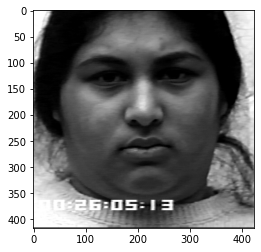

In [70]:
print(cv2.imread(image_path[0]).shape)
plt.imshow(cv2.imread(image_path[0]))
plt.show()

# ☃️  Extracting landmark and writing to CSV

In [71]:
empty_list_big = []
empty_list_small = []
name_of_lists = []
for i in range(1,469):
    name_of_lists.append(str(i)+'x')
    name_of_lists.append(str(i)+'y')
    

mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(max_num_faces=2)
drawSpec = mpDraw.DrawingSpec(thickness=1, circle_radius=2)

for img in image_path:
    img=cv2.imread(img)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    results = faceMesh.process(imgRGB)
    if results.multi_face_landmarks:
        for faceLms in results.multi_face_landmarks:
            mpDraw.draw_landmarks(img, faceLms, mpFaceMesh.FACE_CONNECTIONS,
                                  drawSpec,drawSpec)
            for id,lm in enumerate(faceLms.landmark):
                ih, iw, ic = img.shape
                x,y = lm.x,lm.y
                empty_list_small.append(x)
                empty_list_small.append(y)
            empty_list_small.append(class_names[5])
            empty_list_big.append(empty_list_small)
            empty_list_small = []

df = pd.DataFrame(empty_list_big, columns = name_of_lists+['output'])
df.to_csv(class_names[5]+".csv", index= False)


#  🌎  Merge CSV

In [75]:
csv_file_list = []

for i in range(0,len(class_names)):
    csv_file_list.append(class_names[i]+".csv")

print(csv_file_list)

['anger.csv', 'contempt.csv', 'disgust.csv', 'fear.csv', 'happiness.csv', 'neutral.csv', 'sadness.csv', 'surprise.csv']


In [76]:
list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

merged_df.to_csv('dataset.csv')

print(merged_df.shape)

(920, 937)
